In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as pch

%matplotlib inline

In [2]:
def kmeans(fname, k=3):
    ''' k-means clustering in OpenCV. Returns values in RGB format '''
    img = cv2.imread(fname)
    z = img.reshape((-1,3))
    z = np.float32(z) # convert to np.float32
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret, label, center = cv2.kmeans(z,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center) # back into uint8
    center_rgb = [bgr_to_rgb(x) for x in center]
    return(center_rgb)

def bgr_to_rgb(val):
    ''' Convert a list of BGR color tuples to RGB tuples '''
    b, g, r = val
    return((r, g, b))

def get_contrast_color(color):
    ''' Returns white or black, whichever is most different from given RGB color.
        For easy plotting of legible text on colored backgrounds.'''
    if np.mean(color) < 255/2: 
        return('#ffffff')
    else: 
        return('#000000')
    
def plot_clusters(fname, centers_rgb, spacer=1.5):
    ''' Show results of cluster analysis. 
        spacer variable is space allocated to results on right, 
        as a fraction of image width.'''
    fig = plt.figure(figsize=(6, 4))

    img = cv2.imread(fname)
    width, height = len(img[0]), len(img)

    ax1 = fig.add_subplot(111)
    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), origin='upper')

    for n in range(0, len(centers_rgb)):
        color = [x/255 for x in centers_rgb[n]] 
        # matplotlib encodes RGB vals as 0~1 instead of 0~255
        box_count = len(centers_rgb)
        y = n * height/box_count
        ax1.add_patch(pch.Rectangle((width, y), width*spacer, height/box_count, 
                                    fc=color, ec='none'))
        textcolor = get_contrast_color(centers_rgb[n])
        ax1.text(width+(width*(spacer-1)/2), y+height/box_count/2, centers_rgb[n],
                ha='center', va='center', color=textcolor)

    ax1.set_xlim(0, width*spacer)
    ax1.axis('off')
    plt.show()
    return(fig)

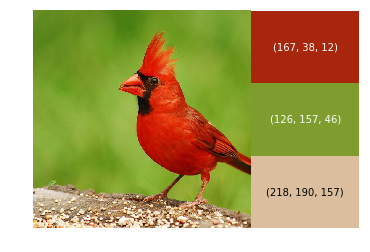

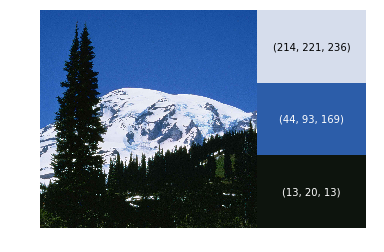

In [3]:
fnames = ['./data/cardinal.jpg', './data/mountain.jpg']

for fname in fnames: 
    centers = kmeans(fname, k=3)
    fig = plot_clusters(fname, centers)
    plt.close('all')

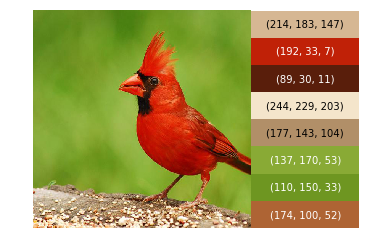

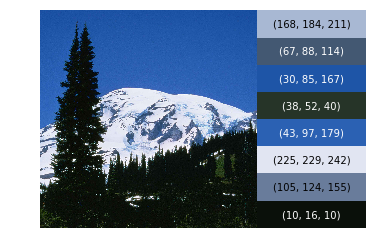

In [4]:
# Also works for more than 3 clusters! 

for fname in fnames: 
    centers = kmeans(fname, k=8)
    fig = plot_clusters(fname, centers)
    plt.close('all')